# HOTEL DATASET

In [1]:
#importing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
hotel = pd.read_csv("hotels.csv")

print(hotel)

       Profit  Price in Millions  Square Meter     City
0    119000.0              21.88        3938.0   Berlin
1    250000.0              27.95        3986.0   Munich
2    250000.0              16.09        2574.0  Cologne
3    145000.0              27.58        4155.0   Munich
4    110000.0              23.76        3795.0   Berlin
..        ...                ...           ...      ...
145   45000.0              10.50        1775.0  Cologne
146  250000.0              23.80        4058.0  Cologne
147   32000.0              12.86        1668.0   Berlin
148   35000.0              15.80        2281.0   Berlin
149   90000.0              17.09        2297.0   Berlin

[150 rows x 4 columns]


# DESCRIPTIVE ANALYSIS

In [3]:
hotel.info

<bound method DataFrame.info of        Profit  Price in Millions  Square Meter     City
0    119000.0              21.88        3938.0   Berlin
1    250000.0              27.95        3986.0   Munich
2    250000.0              16.09        2574.0  Cologne
3    145000.0              27.58        4155.0   Munich
4    110000.0              23.76        3795.0   Berlin
..        ...                ...           ...      ...
145   45000.0              10.50        1775.0  Cologne
146  250000.0              23.80        4058.0  Cologne
147   32000.0              12.86        1668.0   Berlin
148   35000.0              15.80        2281.0   Berlin
149   90000.0              17.09        2297.0   Berlin

[150 rows x 4 columns]>

In [33]:
hotel.describe()

,Profit,Price in Millions,Square Meter,City_Berlin,City_Cologne,City_Munich
count,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000
mean,-9.769963e-17,3.167836e-16,1.184238e-16,0.320000,0.406667,0.273333
std,1.003350e+00,1.003350e+00,1.003350e+00,0.468039,0.492857,0.447164
min,-1.367239e+00,-1.988044e+00,-1.757486e+00,0.000000,0.000000,0.000000
25%,-7.960605e-01,-6.470061e-01,-7.663698e-01,0.000000,0.000000,0.000000
50%,-2.314475e-01,-2.601174e-03,-1.131705e-02,0.000000,0.000000,0.000000
75%,4.152312e-01,7.155378e-01,7.227523e-01,1.000000,1.000000,1.000000
max,1.889134e+00,2.803133e+00,2.200683e+00,1.000000,1.000000,1.000000


In [35]:
hotel.agg(["mean", "std"])

,Profit,Price in Millions,Square Meter,City_Berlin,City_Cologne,City_Munich
mean,-9.769963e-17,3.167836e-16,1.184238e-16,0.320000,0.406667,0.273333
std,1.003350e+00,1.003350e+00,1.003350e+00,0.468039,0.492857,0.447164


In [4]:
hotel.isnull().sum()

Profit               0
Price in Millions    0
Square Meter         0
City                 0
dtype: int64

In [5]:
hotel.duplicated().sum()

0

In [6]:
hotel.describe()

,Profit,Price in Millions,Square Meter
count,150.000000,150.000000,150.000000
mean,106126.666667,17.101933,2594.680000
std,76413.507421,6.531691,1434.491133
min,2000.000000,4.160000,82.000000
25%,45500.000000,12.890000,1499.000000
50%,88500.000000,17.085000,2578.500000
75%,137750.000000,21.760000,3628.000000
max,250000.000000,35.350000,5741.000000


# MODEL TRAINING

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(hotel[['Profit', 'Price in Millions', 'Square Meter']])

# Scale the dataframe
scaled_df = scaler.transform(hotel[['Profit', 'Price in Millions', 'Square Meter']])

# Convert the scaled data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=['Profit', 'Price in Millions', 'Square Meter'])

# Add the non-scaled 'City' column to the scaled dataframe
scaled_df['City'] = hotel['City']

# Convert categorical variable into dummy/indicator variables
hotel = pd.get_dummies(scaled_df)

hotel.head()

,Profit,Price in Millions,Square Meter,City_Berlin,City_Cologne,City_Munich
0,0.169034,0.733971,0.939581,1,0,0
1,1.889134,1.666400,0.973154,0,0,1
2,1.889134,-0.155446,-0.014465,0,1,0
3,0.510428,1.609563,1.091361,0,0,1
4,0.050859,1.022763,0.839560,1,0,0


In [8]:
Y = hotel['Profit']

Y

0      0.169034
1      1.889134
2      1.889134
3      0.510428
4      0.050859
         ...   
145   -0.802626
146    1.889134
147   -0.973323
148   -0.933931
149   -0.211752
Name: Profit, Length: 150, dtype: float64

In [9]:
X = hotel.drop(["Profit"], axis= "columns")
X

,Price in Millions,Square Meter,City_Berlin,City_Cologne,City_Munich
0,0.733971,0.939581,1,0,0
1,1.666400,0.973154,0,0,1
2,-0.155446,-0.014465,0,1,0
3,1.609563,1.091361,0,0,1
4,1.022763,0.839560,1,0,0
...,...,...,...,...,...
145,-1.014140,-0.573322,0,1,0
146,1.028908,1.023514,0,1,0
147,-0.651614,-0.648163,1,0,0
148,-0.199993,-0.219402,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 44)

# MODEL PREDICTION

In [11]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()

linearmodel.fit(X_train,Y_train)

LinearRegression()

In [12]:
linearmodel.predict(X_test)

array([ 7.39579088e-01, -3.15818775e-01,  4.35175375e-01, -7.97984242e-01,
       -5.87136986e-01,  3.44002165e-02,  6.79644922e-01,  8.81577902e-01,
       -1.80373038e-01, -1.27363043e+00, -9.84713071e-01,  8.57791216e-01,
        2.22070504e-01, -7.41477003e-02, -8.37451782e-01,  7.69674355e-01,
        1.33376025e+00, -8.18176612e-02,  6.09643061e-01,  6.05463670e-01,
        1.06362285e+00, -6.59260633e-01,  8.40213759e-02,  6.27898868e-01,
       -6.61497805e-01, -4.66979538e-01, -9.54584231e-01,  9.77937759e-01,
       -1.24632385e+00, -1.35760272e-01, -3.09350586e-01,  4.94927578e-01,
       -2.74412673e-01, -1.29929149e-01, -5.61404832e-01,  1.62692925e+00,
       -1.49407424e+00, -8.12477593e-01, -5.10126811e-01,  4.72859629e-01,
       -8.19911752e-01, -6.50318424e-01,  1.96298804e+00, -8.47168892e-04,
        4.90635467e-01])

In [13]:
linearmodel_prediction = linearmodel.predict(X_test)

In [14]:
import sklearn.metrics as metrics

MSE1 = metrics.mean_squared_error(Y_test, linearmodel_prediction)
MSE1

0.6146594252485382

In [15]:
Y_test - linearmodel_prediction

Y_test

144    0.694255
9     -0.776365
79    -0.198621
95    -1.130889
104   -1.301586
47    -0.448101
118    0.195295
107    0.182164
102   -0.461232
90    -1.354108
17    -1.052106
52    -0.251143
46    -0.198621
101    0.287209
28    -0.697581
3      0.510428
105    1.889134
65    -0.119838
32     0.654863
110   -0.224882
71     1.889134
134    1.587131
149   -0.211752
98     0.654863
142   -1.288455
106   -0.487493
23    -1.209672
58    -0.303665
41    -1.157150
76     1.889134
48    -0.067316
97     0.471036
99    -0.881409
111    0.917474
27     1.889134
88     1.889134
7     -1.367239
37    -1.091497
123   -0.763234
80     0.234686
43    -0.434971
6     -0.684451
112    1.889134
26    -0.973323
5      1.836611
Name: Profit, dtype: float64

In [16]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()

randomforestmodel.fit(X_train, Y_train)

RandomForestRegressor()

In [17]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [18]:
MSE = metrics.mean_squared_error(Y_test, randomforestmodel_prediction)

MSE

0.9841675180636246

In [19]:
MSE2 = metrics.mean_squared_error(Y_test, randomforestmodel_prediction)

MSE2

0.9841675180636246

In [20]:
np.sqrt(MSE2)

0.9920521750712633

In [21]:
from sklearn.tree import DecisionTreeRegressor

decisiontree =  DecisionTreeRegressor()

decisiontree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [22]:
decisiontree_prediction = decisiontree.predict(X_test)

In [23]:
decisiontree_prediction1 = decisiontree.predict(X_train)

In [24]:
MSE3 = metrics.mean_squared_error(Y_test, decisiontree_prediction)
MSE3

1.2368068400753032

In [25]:
np.sqrt(MSE3)

1.1121181772074868

In [26]:
hotel.corr()

,Profit,Price in Millions,Square Meter,City_Berlin,City_Cologne,City_Munich
Profit,1.000000,0.593744,0.614568,-0.136253,0.166850,-0.041285
Price in Millions,0.593744,1.000000,0.913728,0.001838,-0.268248,0.293736
Square Meter,0.614568,0.913728,1.000000,-0.002266,0.035033,-0.036242
City_Berlin,-0.136253,0.001838,-0.002266,1.000000,-0.567924,-0.420726
City_Cologne,0.166850,-0.268248,0.035033,-0.567924,1.000000,-0.507748
City_Munich,-0.041285,0.293736,-0.036242,-0.420726,-0.507748,1.000000


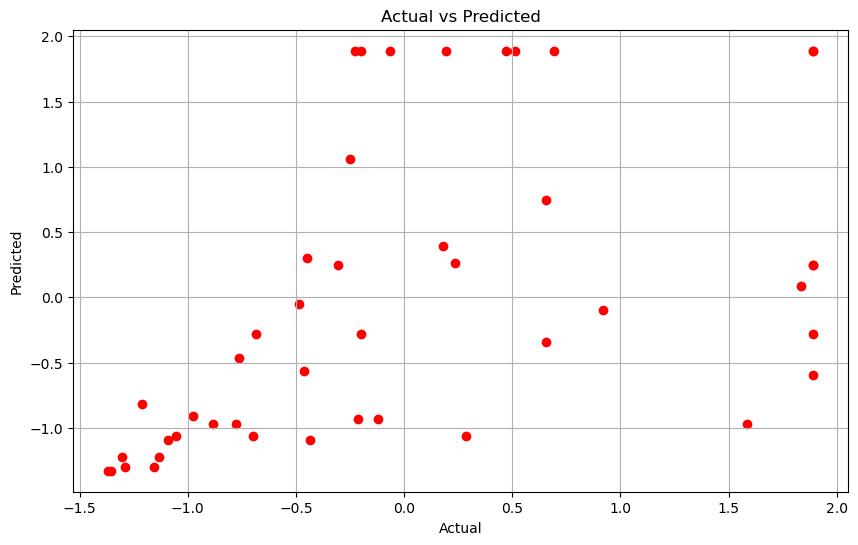

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, decisiontree_prediction, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)

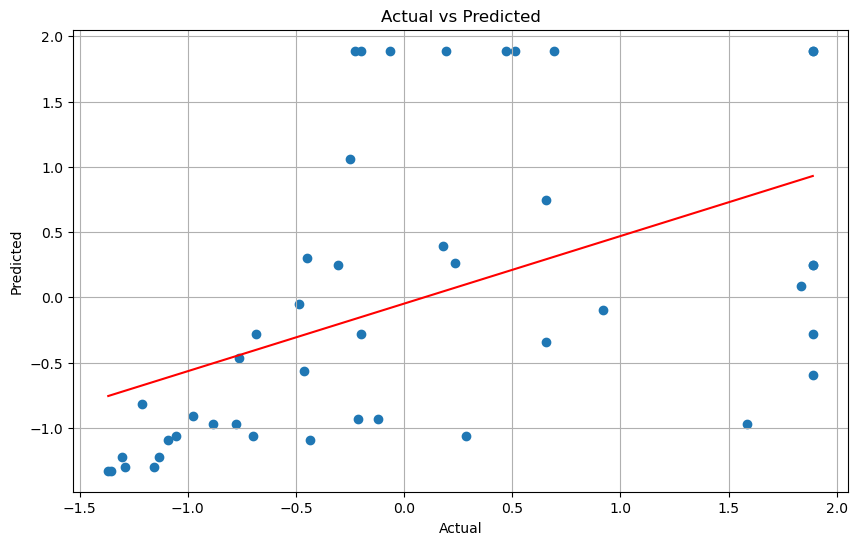

In [28]:
import numpy as np

# Calculate the slope and intercept of the best fit line
slope, intercept = np.polyfit(Y_test, decisiontree_prediction, 1)

# Create a range of values for 'Actual' (x-axis)
x_range = np.linspace(Y_test.min(), Y_test.max(), len(Y_test))

# Calculate the corresponding 'Predicted' values (y-axis)
y_range = slope * x_range + intercept

# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(Y_test, decisiontree_prediction)
plt.plot(x_range, y_range, 'r') # Plot the best fit line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)


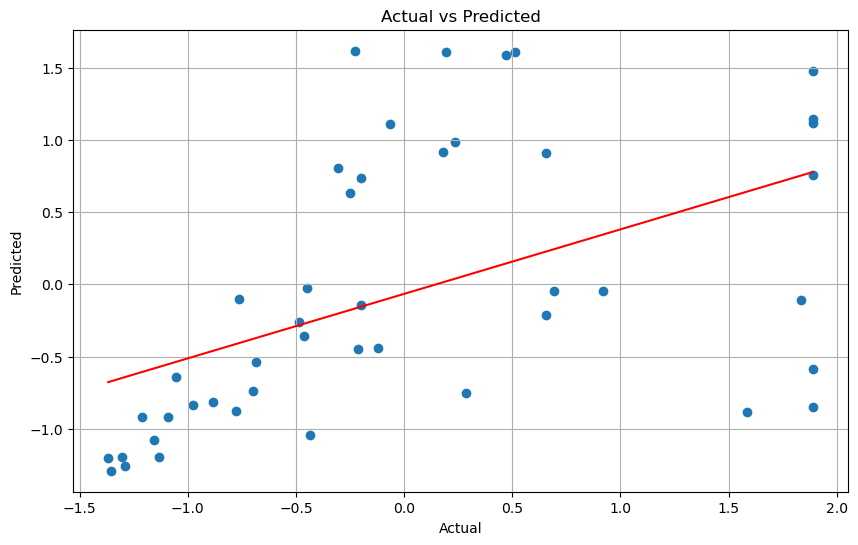

In [29]:
slope, intercept = np.polyfit(Y_test, randomforestmodel_prediction, 1)

# Create a range of values for 'Actual' (x-axis)
x_range = np.linspace(Y_test.min(), Y_test.max(), len(Y_test))

# Calculate the corresponding 'Predicted' values (y-axis)
y_range = slope * x_range + intercept

# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(Y_test, randomforestmodel_prediction)
plt.plot(x_range, y_range, 'r') # Plot the best fit line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)